<a href="https://colab.research.google.com/github/renomrcll/exploratory-data-analysis-csgo-player/blob/main/Menghitung_EDA_Pemain_Pro_CSGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reno Marcello Mohammad - 19/439821/TK/48551**


Tugas Rekayasa Data - Analisis EDA dari Dataset Status Pemain CSGO Profesional

**Menyiapkan Dataset untuk Diolah**

**Import Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Mengunggah File .csv**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving player_stats.csv to player_stats (2).csv


In [ ]:
import io
pemain_df= pd.read_csv(io.BytesIO(uploaded['player_stats.csv']))

**Melihat Sample Data**

In [ ]:
pemain_df.drop("Unnamed: 0", axis = 1, inplace=True)
pemain_df.head(10)

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
6,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
8,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy'...",702,18010,3532,1.33,1.19
9,d4v41,Malaysia,"['BOOT', 'FrostFire', 'Fire Dragoon', 'BOOT-d[...",308,8005,1358,1.27,1.18


In [ ]:
pemain_df.shape

(1869, 8)

Terdapat 1869 Baris dan 8 Kolom

Kolom-kolom tersebut adalah :

In [ ]:
pemain_df.columns


Index(['name', 'country', 'teams', 'total_maps', 'total_rounds', 'kd_diff',
       'kd', 'rating'],
      dtype='object')

Terdapat 8 kolom, yaitu name, country, teams, total_maps, total_rounds, kd_diff, kd, dan rating.

**Melakukan Data Cleaning**

In [ ]:
pemain_df.isnull().sum()

name            0
country         0
teams           0
total_maps      0
total_rounds    0
kd_diff         0
kd              0
rating          0
dtype: int64

Tidak perlu dilakukan data cleaning karena sudah tidak ada yang null.

**Status Kill Difference, Kill/Death, Rating Pemain**

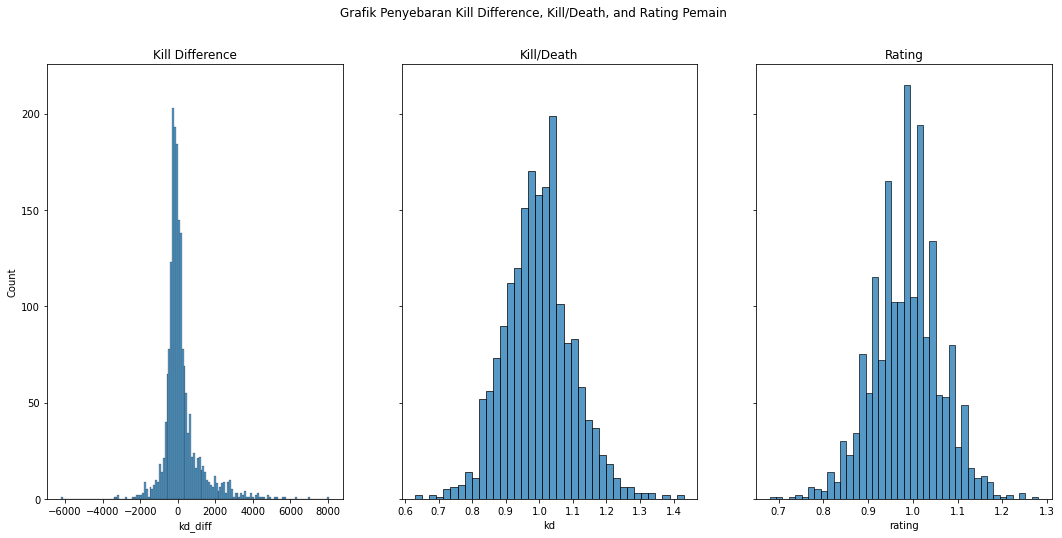

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
fig.suptitle('Grafik Penyebaran Kill Difference, Kill/Death, and Rating Pemain')

sns.histplot(ax=axes[0], x=pemain_df['kd_diff'])
axes[0].set_title('Kill Difference')

sns.histplot(ax=axes[1], x=pemain_df['kd'])
axes[1].set_title('Kill/Death')

sns.histplot(ax=axes[2], x=pemain_df['rating'])
axes[2].set_title('Rating')

plt.show()

Dari grafik diatas dapat diketahui penyebaran angka dari kill difference, kill/death, dan rating dari para pemain. Dimana terjadi distribusi normal yang menumpuk dibagian tengah kemudian menyebar kesisi-sisinya.

**Grafik Penyebaran Total Maps dan Total Rounds**

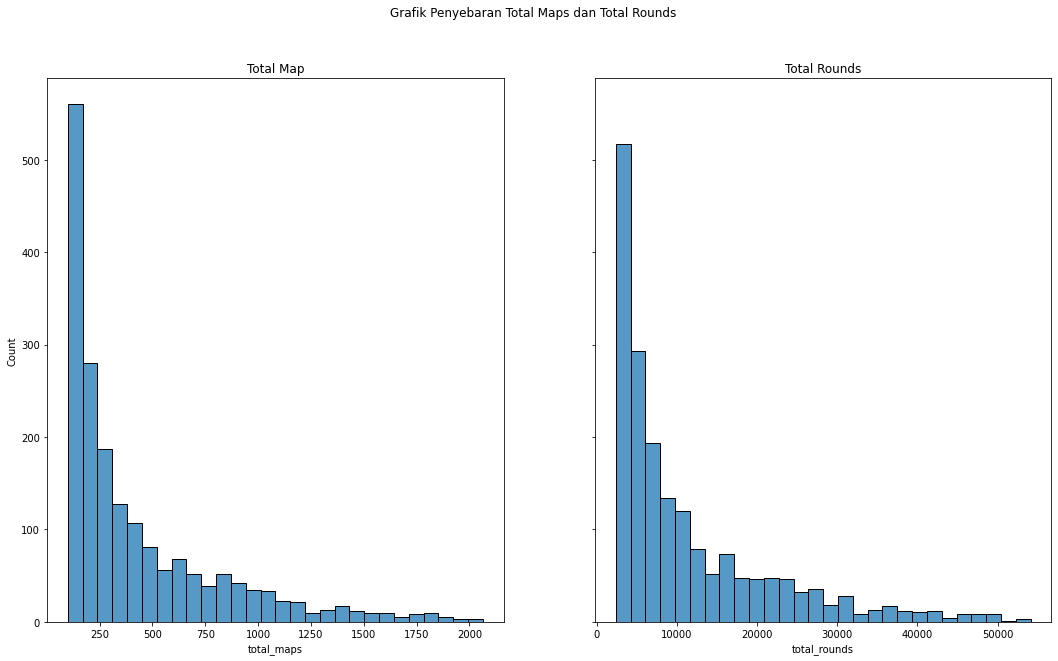

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)
fig.suptitle('Grafik Penyebaran Total Maps dan Total Rounds')

sns.histplot(ax=axes[0], x=pemain_df['total_maps'])
axes[0].set_title('Total Map')

sns.histplot(ax=axes[1], x=pemain_df['total_rounds'])
axes[1].set_title('Total Rounds')


plt.show()

Dari Grafik Penyebaran Total Maps dan Total Rounds ini dapat dilihat bahwa grafik berbentuk eksponensial, semakin banyak total maps/total rounds, semakin sedikit pemainnya.

**10 Pemain Terbaik**

In [ ]:
pemain_terbaik_10 = pemain_df.head(10)
pemain_terbaik_10.index +=1
pemain_terbaik_10

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
1,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
2,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
3,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
4,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
5,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
6,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
7,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
8,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
9,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy'...",702,18010,3532,1.33,1.19
10,d4v41,Malaysia,"['BOOT', 'FrostFire', 'Fire Dragoon', 'BOOT-d[...",308,8005,1358,1.27,1.18


Tabel diatas merupakan tabel berisikan 10 pemain terbaik yang dinilai berdasarkan rating, Lalu pada analisis selanjutnya akan dibahas dari 10 pemain terbaik diatas.


**10 Pemain dengan Jumlah Maps Dimainkan Terbanyak**

In [ ]:
map_terbaik_10 = pemain_df[['name','total_maps']].sort_values('total_maps', ascending=False).head(10)
map_terbaik_10.index +=1
map_terbaik_10

,name,total_maps
1243,TaZ,2064
554,NBK-,2025
429,Snax,2024
865,Furlan,1951
1198,NEO,1933
82,f0rest,1929
691,bubble,1923
365,JW,1879
196,shox,1873
729,SZPERO,1864


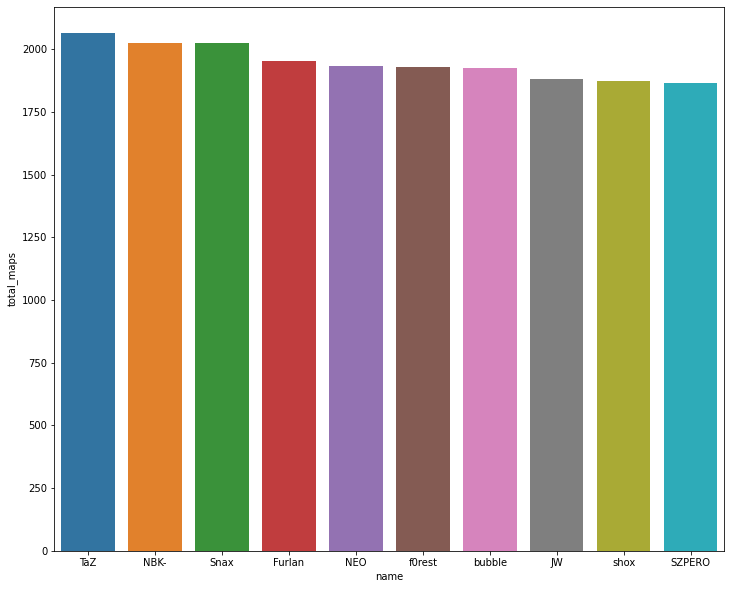

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=map_terbaik_10['name'], y=map_terbaik_10['total_maps'])
plt.show()

Total Maps dimainkan dapat menentukan pengalaman pemain dengan seberapa banyak mereka bermain. Dapat dilihat dari grafik diatas, pemain yang memainkan Map terbanyak yaitu TaZ, dilanjut NBK-, Snax, dan lain-lain, namun tidak terdapat nama dari 10 pemain terbaik. 

**10 Pemain dengan Jumlah Ronde Dimainkan Terbanyak**

In [ ]:
ronde_terbaik_10 = pemain_df[['name','total_rounds']].sort_values('total_rounds', ascending=False).head(10)
ronde_terbaik_10.index +=1
ronde_terbaik_10

,name,total_rounds
1243,TaZ,54137
429,Snax,53382
554,NBK-,52921
865,Furlan,51887
1198,NEO,50399
691,bubble,50230
82,f0rest,49895
365,JW,49346
729,SZPERO,49189
196,shox,49128


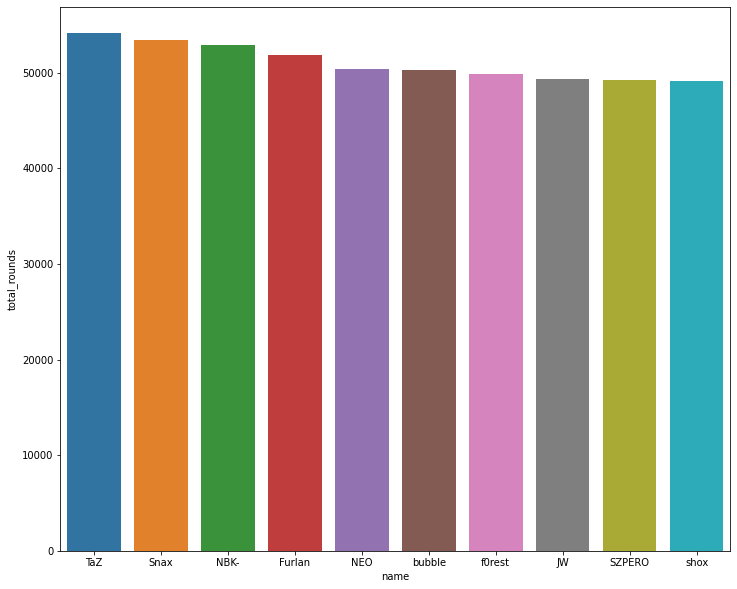

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=ronde_terbaik_10['name'], y=ronde_terbaik_10['total_rounds'])
plt.show()

Dari grafik diatas dapat dilihat pemain dengan jumlah ronde dimainkan terbanyak linier dengan pemain dengan jumlah maps dimainkan terbanyak, karena pada setiap maps dimainkan, terdapat kemungkinan ronde yang dimainkan adalah kurang lebih 30 ronde, apabila permainan tidak sengit dapat berakhir dalam 15 ronde, apabila sengit dapat lebih dari 30 ronde.

Namun dapat dilihat juga tidak terdapat nama 10 pemain terbaik diatas, hal ini menandakan bahwa pengalaman bermain yang banyak, tidak menentukan kemampuan mekanik pemain dalam bermain.

**Top 10 Kill per Death**

In [ ]:
kd_terbaik_10 = pemain_df[['name','kd']].sort_values('kd', ascending=False).head(10)
kd_terbaik_10.index+=1
kd_terbaik_10

,name,kd
5,sh1ro,1.43
3,deko,1.42
1,ZywOo,1.38
4,saffee,1.37
9,sterling,1.33
20,SENSEi,1.33
2,s1mple,1.33
7,Kaze,1.32
6,m0NESY,1.31
8,degster,1.31


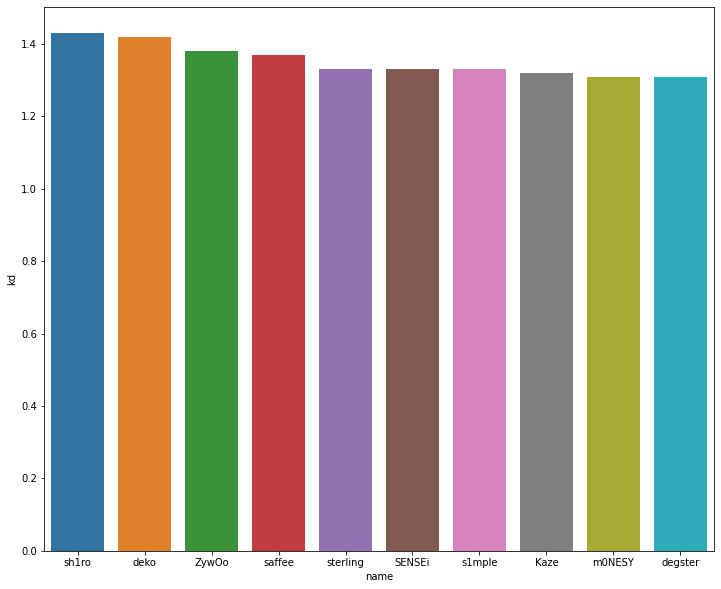

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=kd_terbaik_10['name'], y=kd_terbaik_10['kd'])
plt.show()

Dari grafik diatas dapat dilihat bahwa 10 pemain terbaik masuk kedalamnya, namun ada 1 pemain yaitu pemain terbaik ke-10 yang digeser oleh pemain terbaik ke-20 yaitu SENSEi. Namun tetap dapat disimpulkan bahwa kill/death masih linier dengan rating.

**Top 10 Kill Difference**

In [ ]:
diff_terbaik_10 = pemain_df[['name','kd_diff']].sort_values('kd_diff', ascending=False).head(10)
diff_terbaik_10.index+=1
diff_terbaik_10

,name,kd_diff
2,s1mple,8070
23,device,7005
54,kennyS,6344
22,coldzera,5661
82,f0rest,5571
16,XANTARES,5320
1,ZywOo,5248
32,NiKo,4942
40,Jame,4765
80,GuardiaN,4753


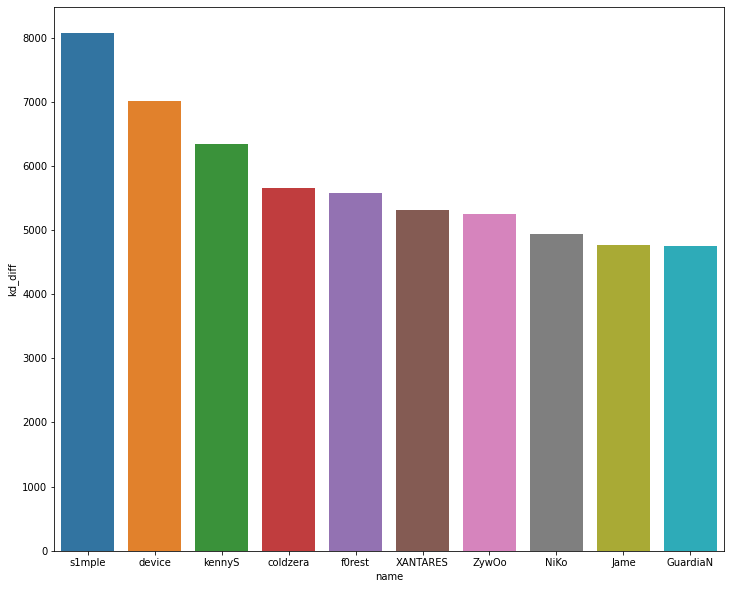

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=diff_terbaik_10['name'], y=diff_terbaik_10['kd_diff'])
plt.show()

Dapat dilihat bahwa pemain dengan kill difference terbaik hanya terdapat 2 dari daftar 10 terbaik. Dengan peringkat pertama s1mple yang menempati posisi 2 terbaik dengan kill difference terbesar. 

Selanjutnya kita akan melihat korelasi dari semua data diatas dengan correlation matrix.

**Correlation Matrix**

In [ ]:
corr_matrix=pemain_df.corr()
corr_matrix

,total_maps,total_rounds,kd_diff,kd,rating
total_maps,1.000000,0.999800,0.443814,0.331059,0.303886
total_rounds,0.999800,1.000000,0.442883,0.330561,0.303443
kd_diff,0.443814,0.442883,1.000000,0.760398,0.732967
kd,0.331059,0.330561,0.760398,1.000000,0.981647
rating,0.303886,0.303443,0.732967,0.981647,1.000000


Lalu kita terpkan kedalam HeatMap

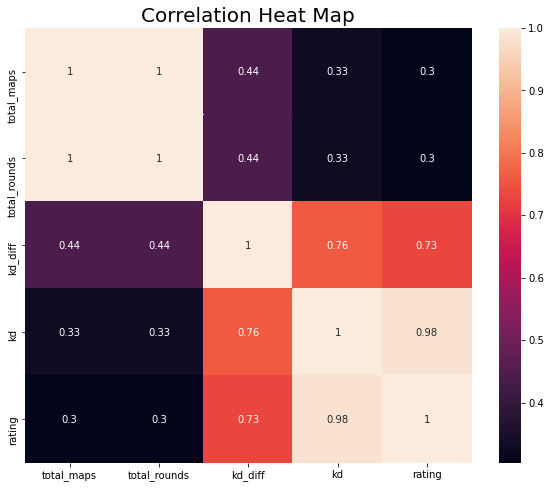

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heat Map', size=20)
plt.show()

**Kesimpulan**

Dapat disimpulkan dari HeatMap diatas bahwa rating seorang pemain ditentukan dengan faktor terbesar yaitu Kill per Death dan Kill Difference dari pemain, pengalaman pemain berdasarkan total maps dan total rounds tidak berpengaruh besar terhadap rating pemain.